## Loading Data

In [1]:
rm(list=ls())
brp=read.csv("day.csv",header = T,na.strings = c(" ","","NA"))
str(brp)

'data.frame':	731 obs. of  16 variables:
 $ instant   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ dteday    : Factor w/ 731 levels "2011-01-01","2011-01-02",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ season    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ yr        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mnth      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ holiday   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ weekday   : int  6 0 1 2 3 4 5 6 0 1 ...
 $ workingday: int  0 0 1 1 1 1 1 0 0 1 ...
 $ weathersit: int  2 2 1 1 1 1 2 2 1 1 ...
 $ temp      : num  0.344 0.363 0.196 0.2 0.227 ...
 $ atemp     : num  0.364 0.354 0.189 0.212 0.229 ...
 $ hum       : num  0.806 0.696 0.437 0.59 0.437 ...
 $ windspeed : num  0.16 0.249 0.248 0.16 0.187 ...
 $ casual    : int  331 131 120 108 82 88 148 68 54 41 ...
 $ registered: int  654 670 1229 1454 1518 1518 1362 891 768 1280 ...
 $ cnt       : int  985 801 1349 1562 1600 1606 1510 959 822 1321 ...


## Loading Packages

In [2]:
x=c("ggplot2","corrgram","DMwR","caret","randomForest","unbalanced","C50","inTrees",
    "dummies","e1071","Information","MASS","rpart","gbm","ROSE","sampling","RRF","AICcmodavg","Metrics","glmnet")
lapply(x,require,character.only = TRUE)
rm(x)

Loading required package: ggplot2

Loading required package: corrgram

Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus

Loading required package: DMwR

Loading required package: lattice


Attaching package: 'lattice'


The following object is masked from 'package:corrgram':

    panel.fill


Loading required package: grid

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: caret

Loading required package: randomForest

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


Loading required package: unbalanced

Loading required package: mlr

Loading required package: ParamHelpers

'mlr' is in maintenance mode since July 2019. Future development
efforts will go into its successor 'mlr3' (<https://mlr3.mlr-org.com>).


Attaching package: 'mlr'




[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

[[17]]
[1] TRUE

[[18]]
[1] TRUE

[[19]]
[1] TRUE

[[20]]
[1] TRUE

## For input data

In [3]:
# sample case values: 2012-12-26	1	1	12	0	3	1	3	0.243333	0.220333	0.823333	0.316546	9	432	441

print("sample case values: 2012-12-26 1  1  12  0  3  1  3  0.243333  0.220333  0.823333  0.316546  9  432  441")
dteday = readline(prompt="Enter dteday: ")
season = as.integer(readline(prompt="Enter season: "))
yr = as.integer(readline(prompt="Enter yr: "))
mnth = as.integer(readline(prompt="Enter month: "))
holiday = as.integer(readline(prompt="Enter holiday: "))
weekday = as.integer(readline(prompt="Enter weekday: "))
workingday = as.integer(readline(prompt="Enter workingday: "))
weathersit = as.integer(readline(prompt="Enter weathersit: "))
temp = as.double(readline(prompt="Enter temp: "))
atemp = as.double(readline(prompt="Enter atemp: "))
hum = as.double(readline(prompt="Enter hum: "))
windspeed = as.double(readline(prompt="Enter windspeed: "))


[1] "sample case values: 2012-12-26 1  1  12  0  3  1  3  0.243333  0.220333  0.823333  0.316546  9  432  441"
Enter dteday: 2012-12-26
Enter season: 1
Enter yr: 1
Enter month: 12
Enter holiday: 0
Enter weekday: 3
Enter workingday: 1
Enter weathersit: 3
Enter temp: 0.243
Enter atemp: 0.2203
Enter hum: 0.823
Enter windspeed: 0.314


In [4]:
names(brp)[names(brp) == "mnth"] <- "month"
names(brp)[names(brp) == "cnt"] <- "count"
str(brp)

'data.frame':	731 obs. of  16 variables:
 $ instant   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ dteday    : Factor w/ 731 levels "2011-01-01","2011-01-02",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ season    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ yr        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ month     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ holiday   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ weekday   : int  6 0 1 2 3 4 5 6 0 1 ...
 $ workingday: int  0 0 1 1 1 1 1 0 0 1 ...
 $ weathersit: int  2 2 1 1 1 1 2 2 1 1 ...
 $ temp      : num  0.344 0.363 0.196 0.2 0.227 ...
 $ atemp     : num  0.364 0.354 0.189 0.212 0.229 ...
 $ hum       : num  0.806 0.696 0.437 0.59 0.437 ...
 $ windspeed : num  0.16 0.249 0.248 0.16 0.187 ...
 $ casual    : int  331 131 120 108 82 88 148 68 54 41 ...
 $ registered: int  654 670 1229 1454 1518 1518 1362 891 768 1280 ...
 $ count     : int  985 801 1349 1562 1600 1606 1510 959 822 1321 ...


## Boxplot for variables

[1] "instant"    "season"     "yr"         "month"      "holiday"   
 [6] "weekday"    "workingday" "weathersit" "temp"       "atemp"     
[11] "hum"        "windspeed"  "casual"     "registered" "count"

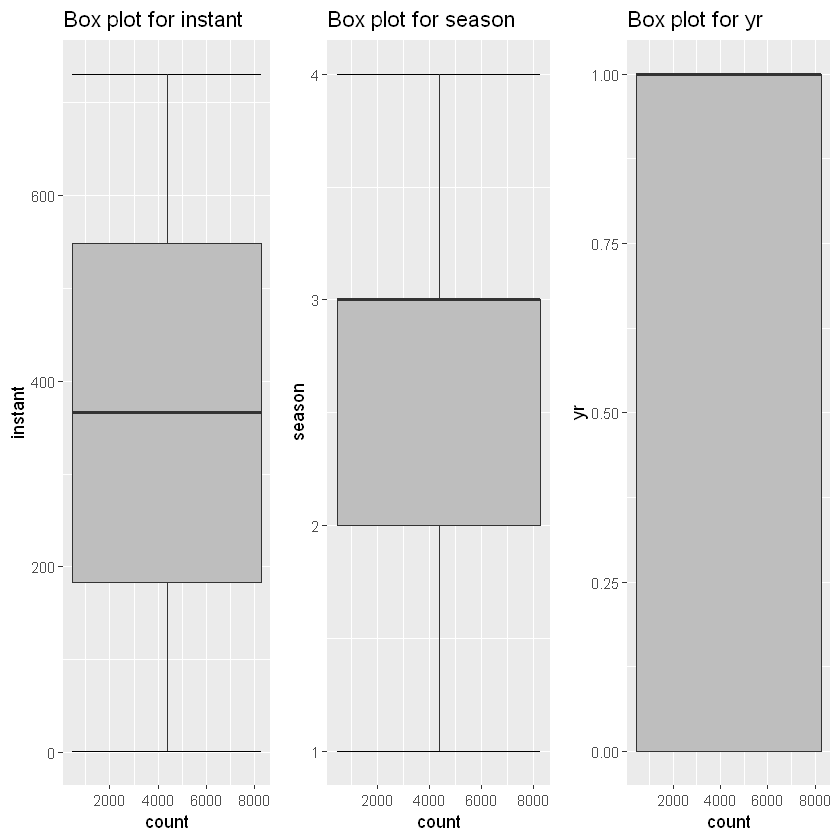

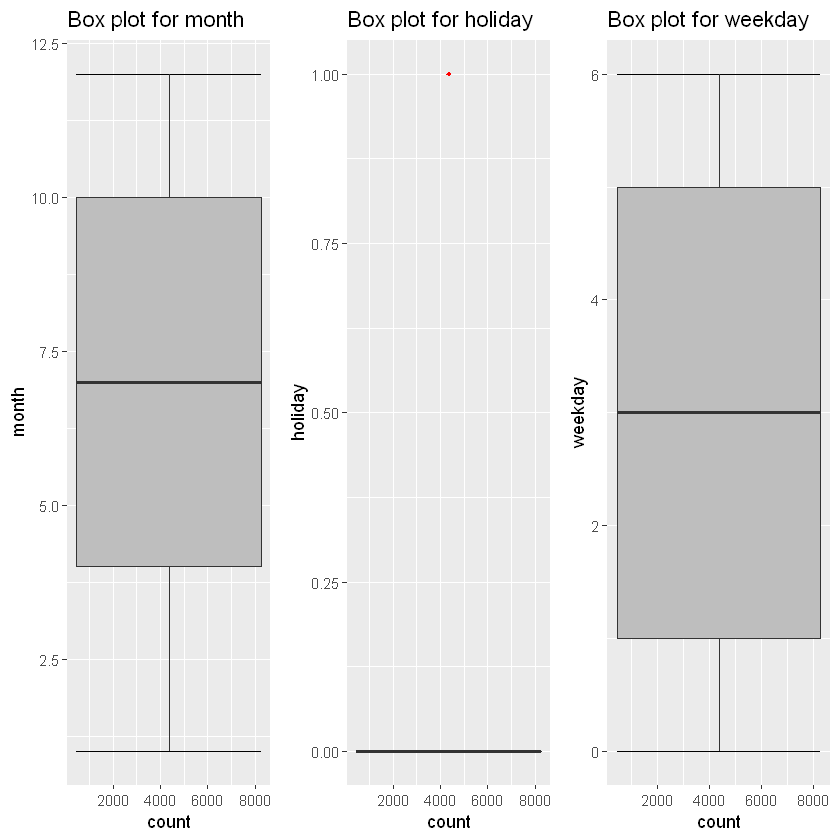

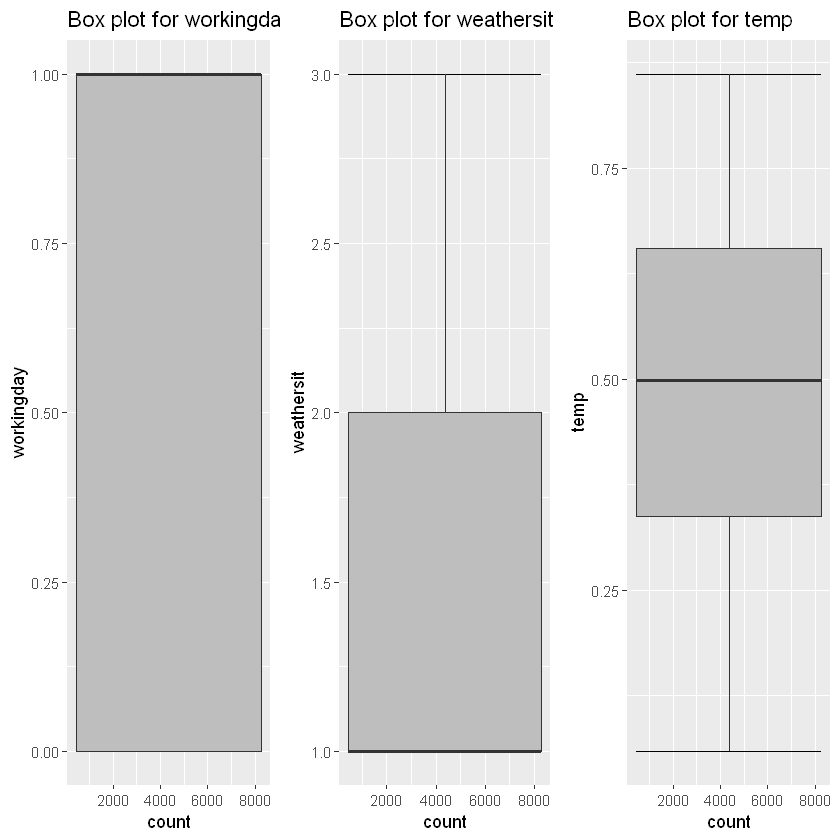

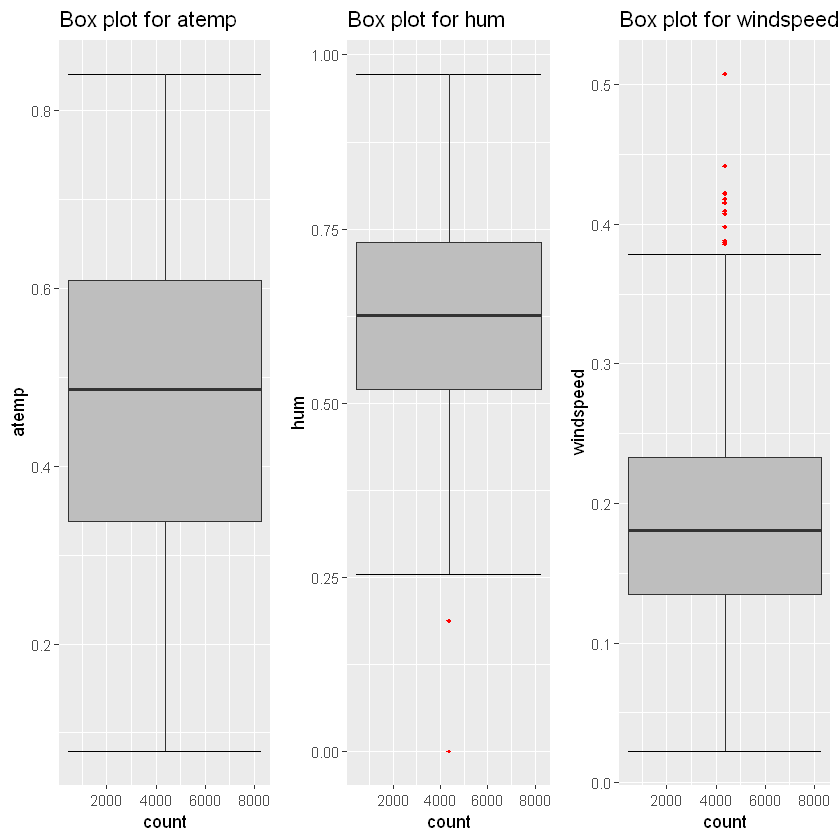

In [5]:
# (1).Box plot
options(warn=-1)
# brp$casual = toString(brp$casual)
# brp$registered = toString(brp$registered)

numeric_index = sapply(brp ,is.numeric)
numeric_data = brp[,numeric_index]
cnames = colnames(numeric_data)
cnames
for(i in 1:length(cnames))
{
  assign(paste0("gn",i), ggplot(aes_string(y = (cnames[i]), x = "count"), data = subset(brp))+
           stat_boxplot(geom = "errorbar" , width = 0.5)+
           geom_boxplot(outlier.color="red",fill ="grey",outlier.shape = 18,
                        outlier.size=1,notch=FALSE)+
           theme(legend.position="bottom")+
           labs(y=cnames[i],x= "count")+
           ggtitle(paste("Box plot for", cnames[i])))        
}

#Plotting plots together
#gridExtra is library name

gridExtra::grid.arrange(gn1,gn2,gn3,ncol=3)
gridExtra::grid.arrange(gn4,gn5,gn6,ncol=3)
gridExtra::grid.arrange(gn7,gn8,gn9,ncol=3)
gridExtra::grid.arrange(gn10,gn11,gn12,ncol=3)

options(warn=0)

# brp$casual = as.integer(brp$casual)
# brp$registered = as.integer(brp$registered)
# head(brp)

## Outlier deduction and removal

In [6]:
brp = subset(brp, select = -c(dteday))
temp_brp = subset(brp, select = -c(holiday, casual, registered, count))


numeric_index = sapply(temp_brp ,is.numeric)
numeric_data = temp_brp[,numeric_index]
cnames = colnames(numeric_data)
 
for(i in cnames)
{
#   print(i)
  val = temp_brp[,i][brp[,i] %in% boxplot.stats(temp_brp[,i])$out]
  
#   Put NA in the place of outliers and Impute.    
#   brp[,i][brp[,i] %in% val] = NA    
  
#   Remove the outliers.
  temp_brp = temp_brp[which(!temp_brp[,i] %in% val),]
  
} 

head(temp_brp, 5)


brp <- brp[brp$instant %in% temp_brp$instant,]

# brp = knnImputation(brp, k = 3)
head(brp, 5)
sum(is.na(brp))


,instant,season,yr,month,weekday,workingday,weathersit,temp,atemp,hum,windspeed
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,0,1,6,0,2,0.344167,0.363625,0.805833,0.160446
2,2,1,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539
3,3,1,0,1,1,1,1,0.196364,0.189405,0.437273,0.248309
4,4,1,0,1,2,1,1,0.200000,0.212122,0.590435,0.160296
5,5,1,0,1,3,1,1,0.226957,0.229270,0.436957,0.186900


,instant,season,yr,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


[1] 0

In [7]:
str(brp)

'data.frame':	715 obs. of  15 variables:
 $ instant   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ season    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ yr        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ month     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ holiday   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ weekday   : int  6 0 1 2 3 4 5 6 0 1 ...
 $ workingday: int  0 0 1 1 1 1 1 0 0 1 ...
 $ weathersit: int  2 2 1 1 1 1 2 2 1 1 ...
 $ temp      : num  0.344 0.363 0.196 0.2 0.227 ...
 $ atemp     : num  0.364 0.354 0.189 0.212 0.229 ...
 $ hum       : num  0.806 0.696 0.437 0.59 0.437 ...
 $ windspeed : num  0.16 0.249 0.248 0.16 0.187 ...
 $ casual    : int  331 131 120 108 82 88 148 68 54 41 ...
 $ registered: int  654 670 1229 1454 1518 1518 1362 891 768 1280 ...
 $ count     : int  985 801 1349 1562 1600 1606 1510 959 822 1321 ...


## Histogram to check spread of data

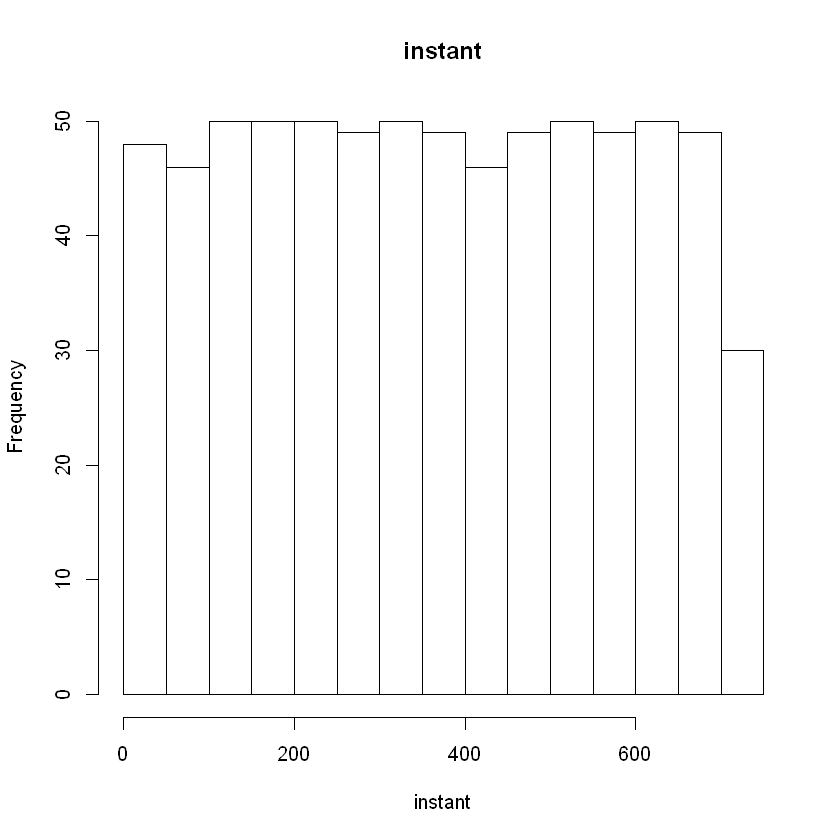

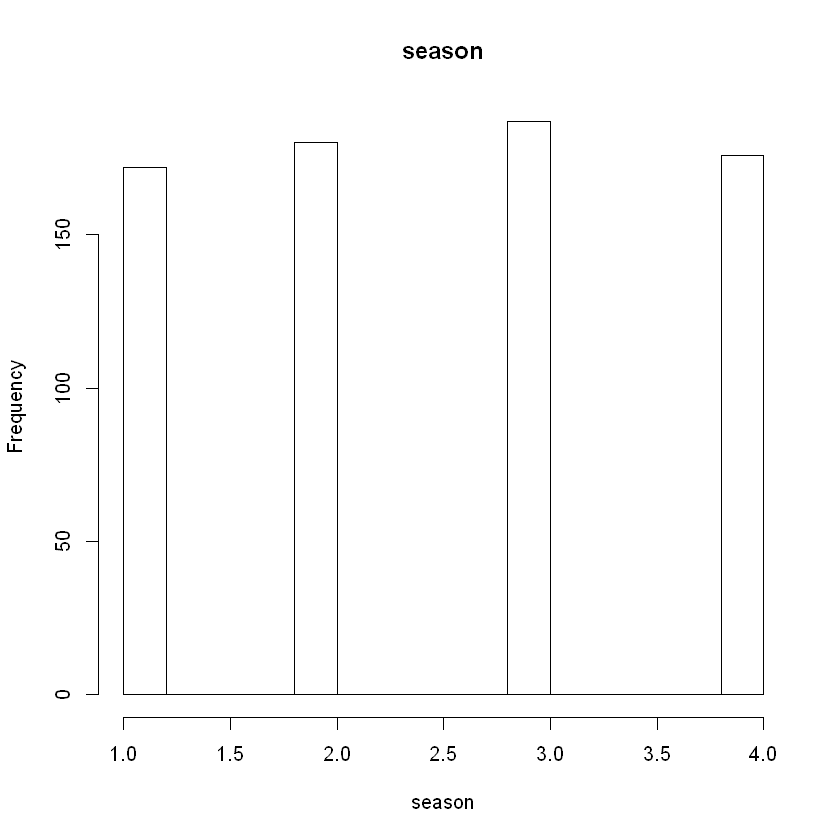

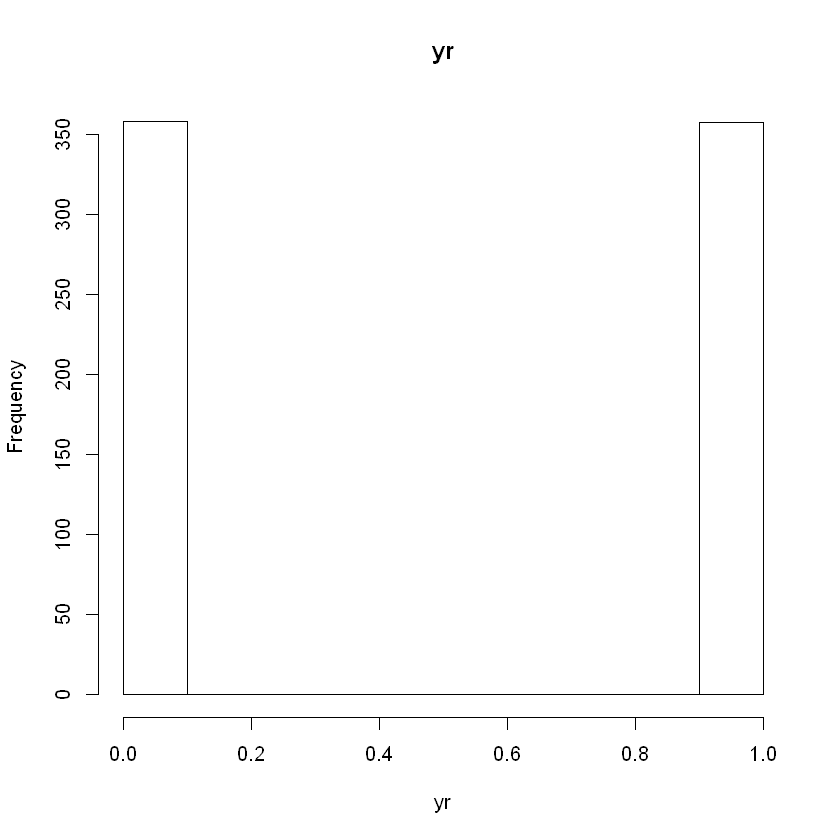

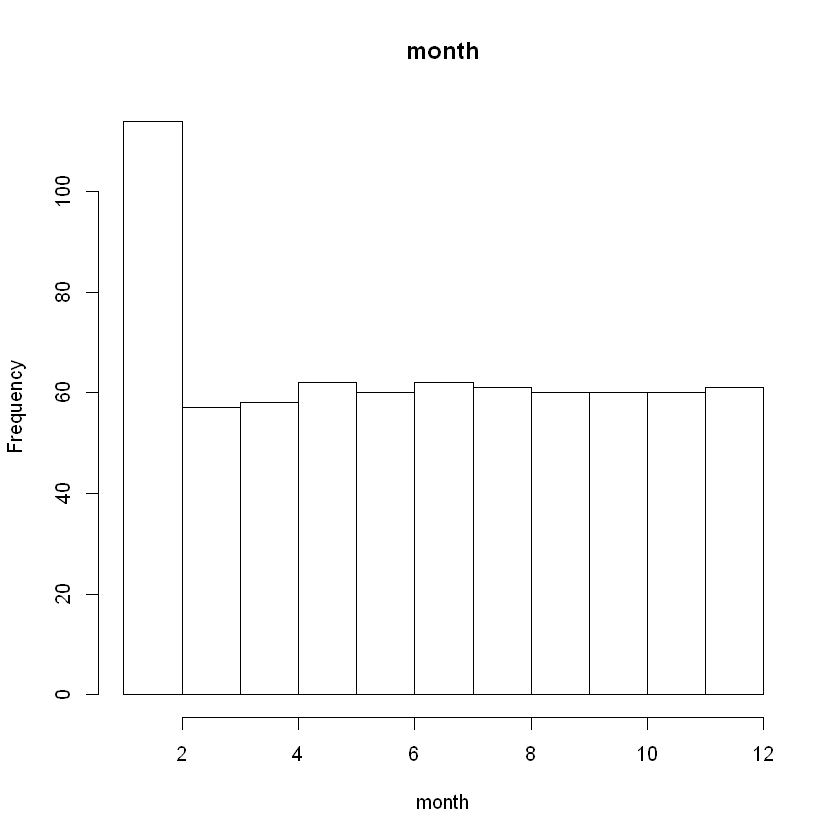

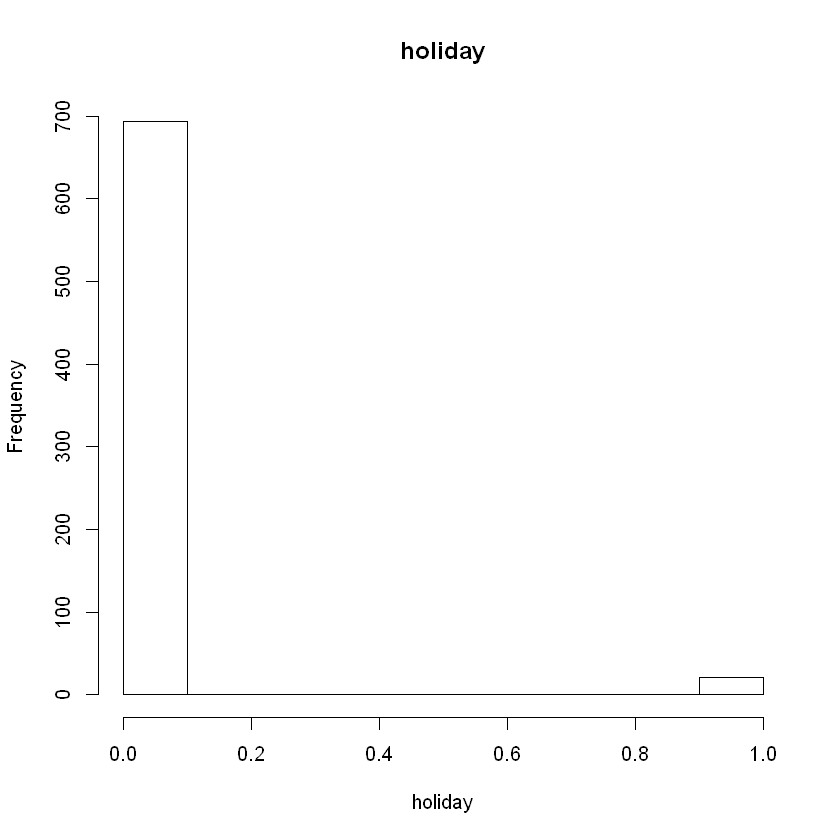

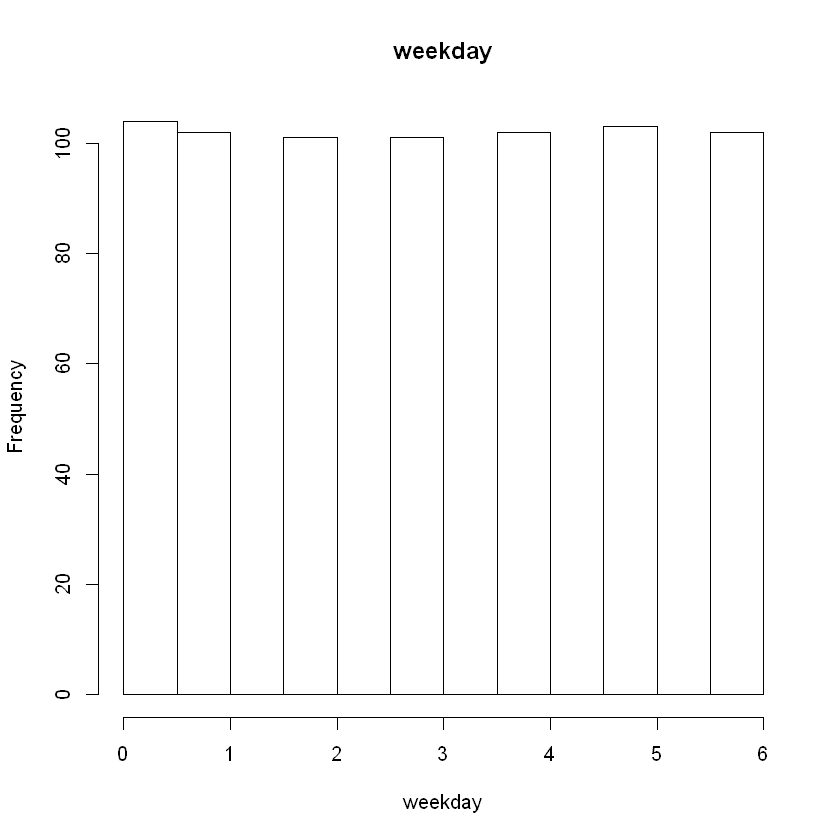

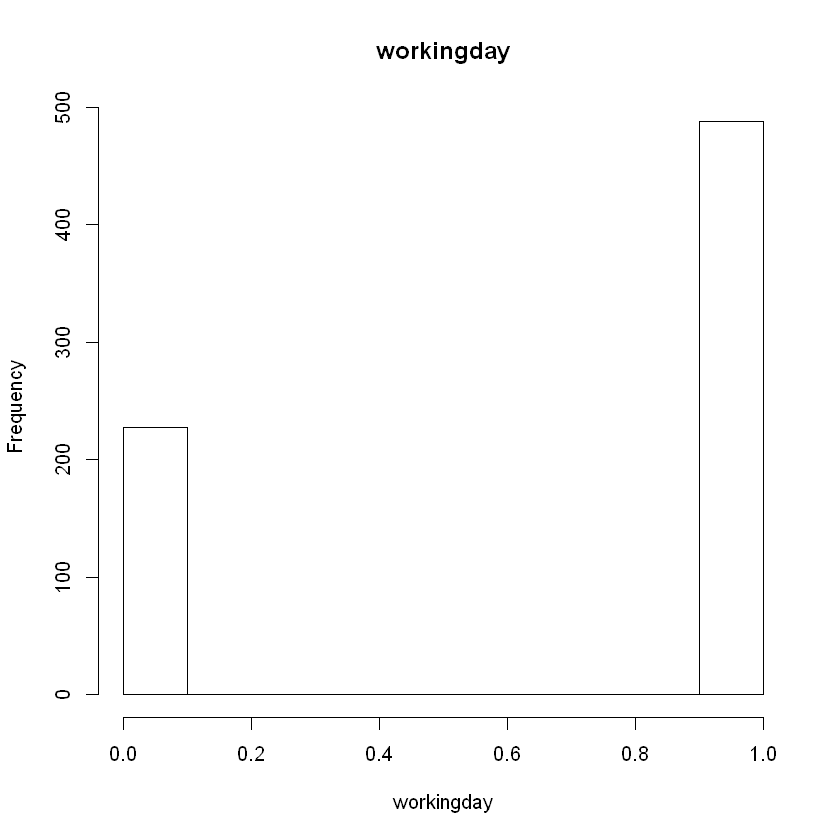

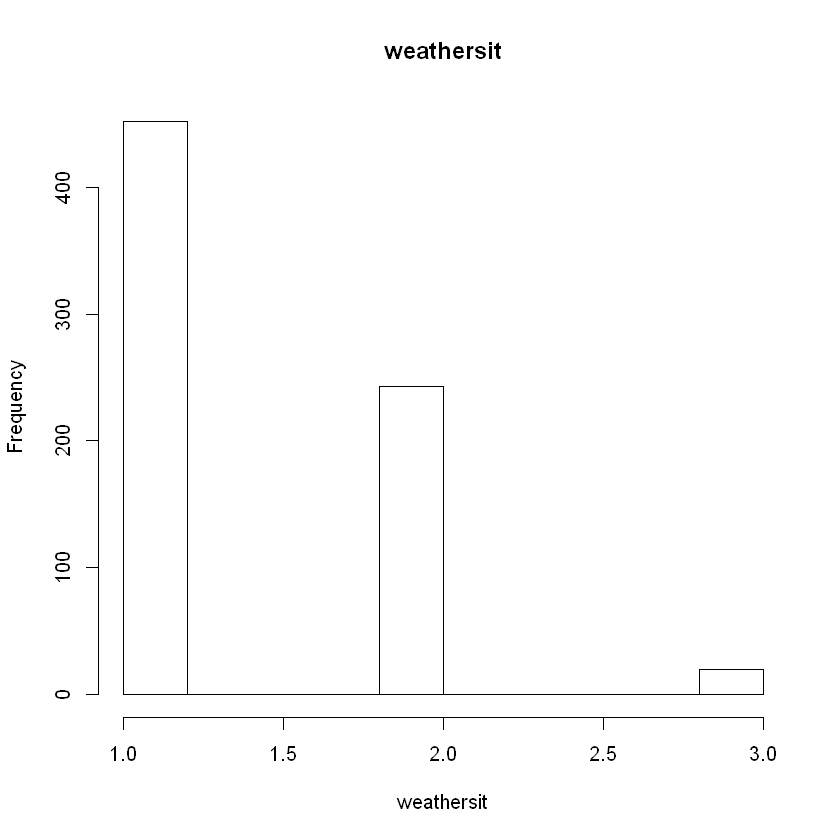

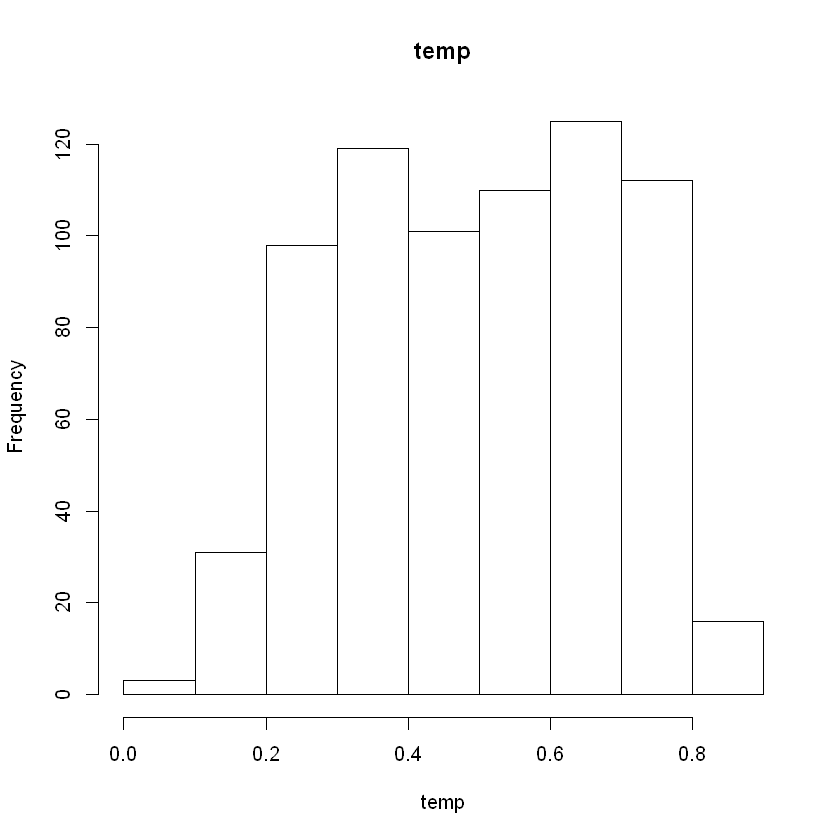

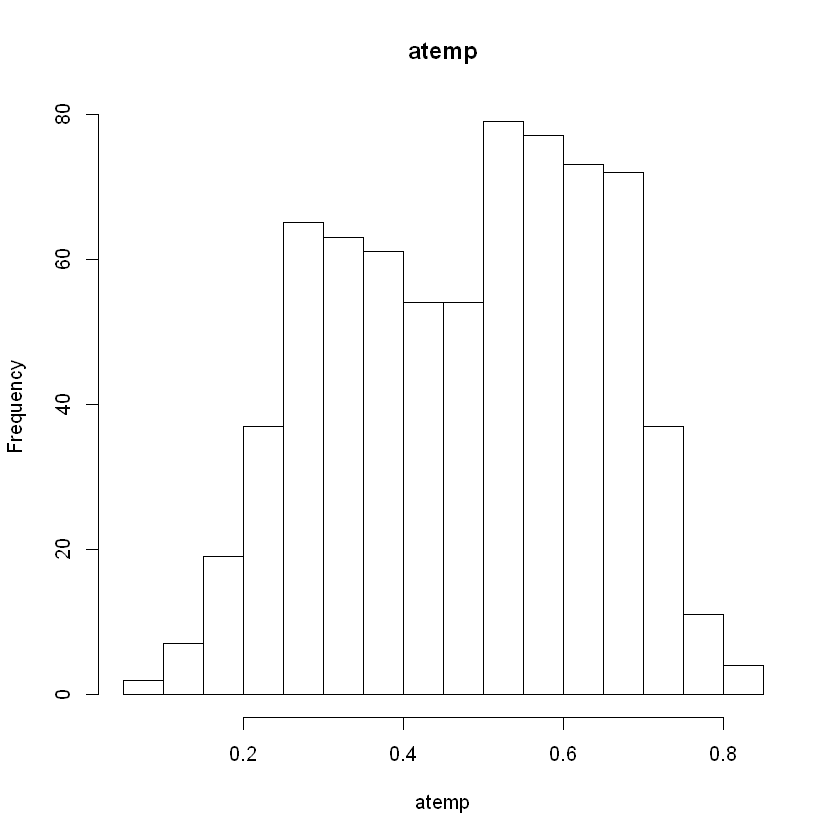

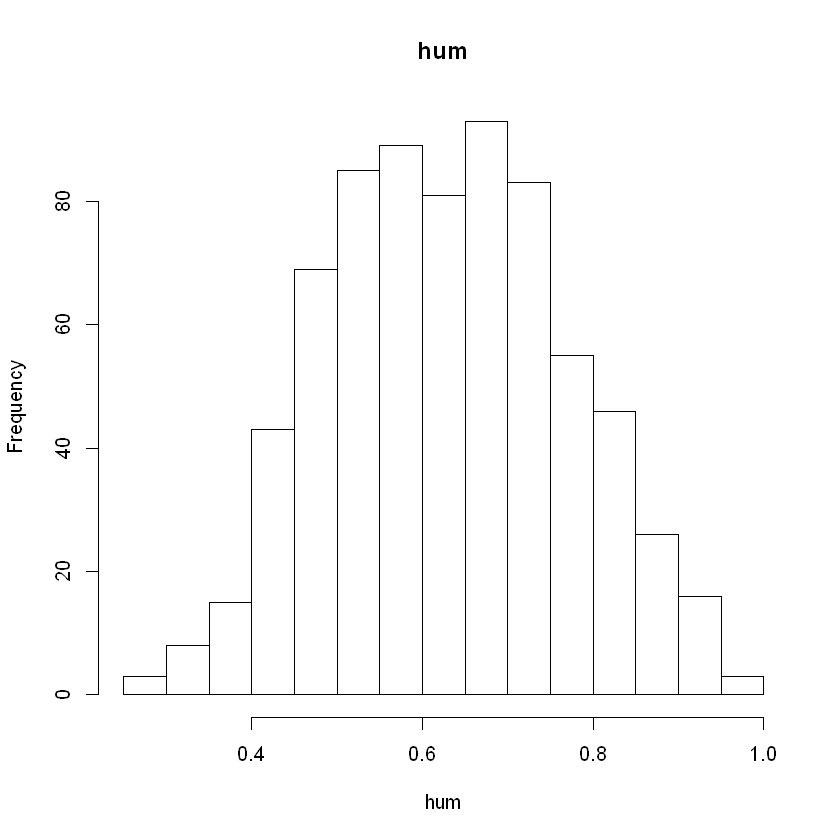

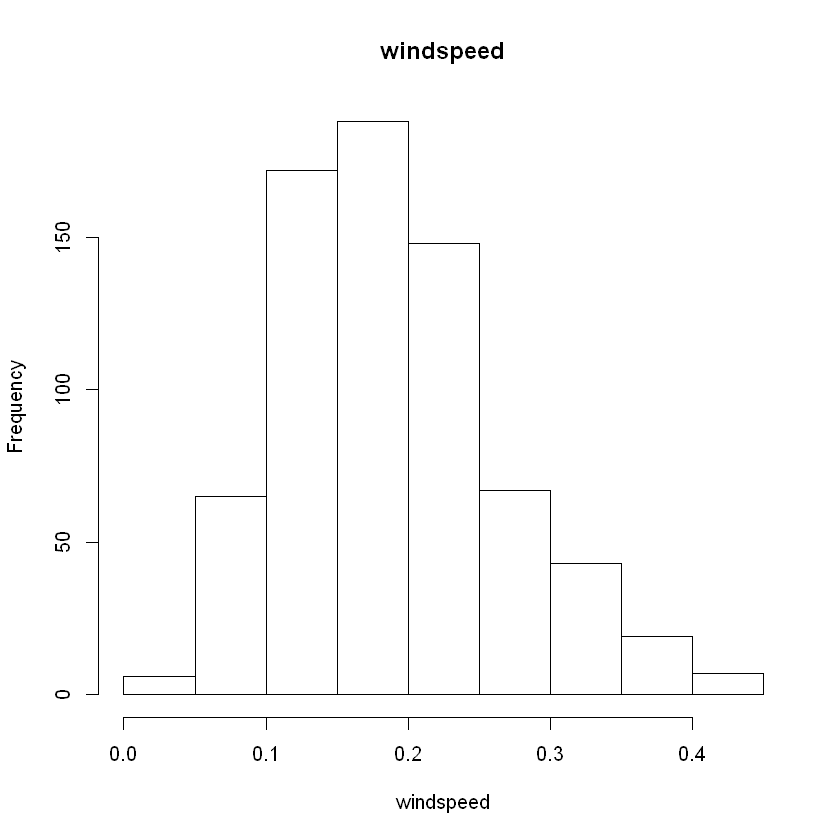

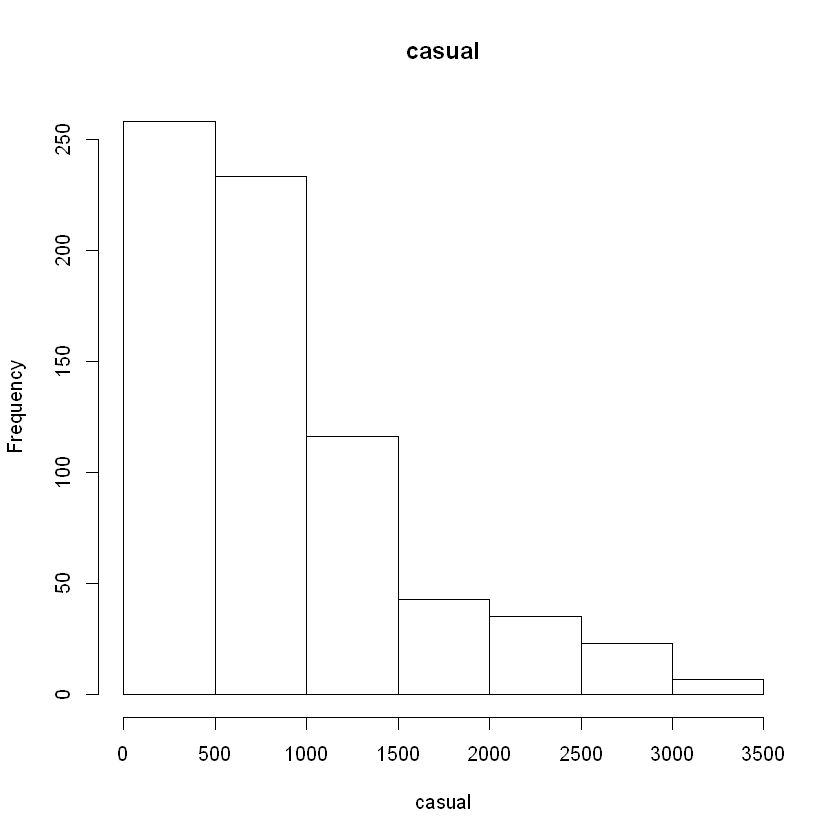

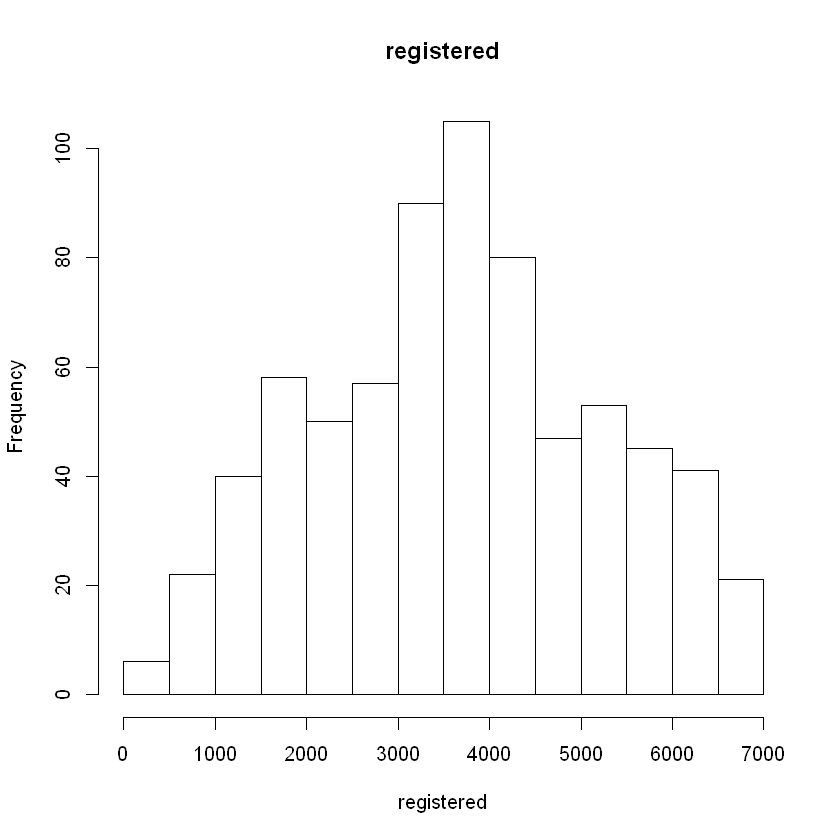

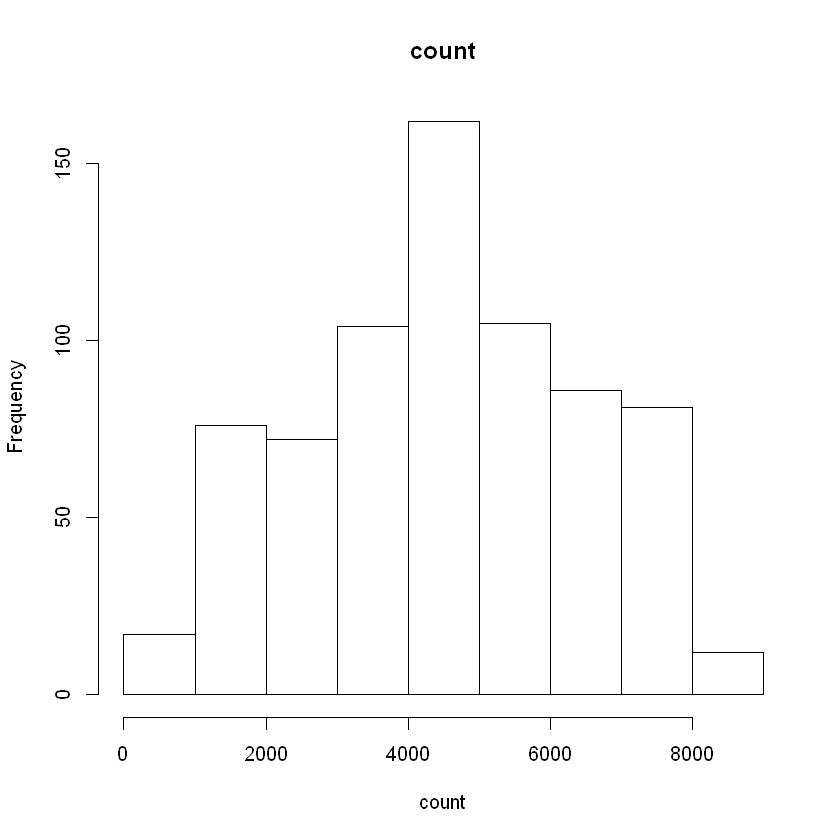

In [8]:
# Histograms to check how the data is spreaded.

cols=c('instant','season','yr','month','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual',
       'registered','count')

for(i in 1:(length(cols)))
{
    hist(brp[,i], xlab = cols[i],main = cols[i])
}    


# head(brp)
# str(brp)


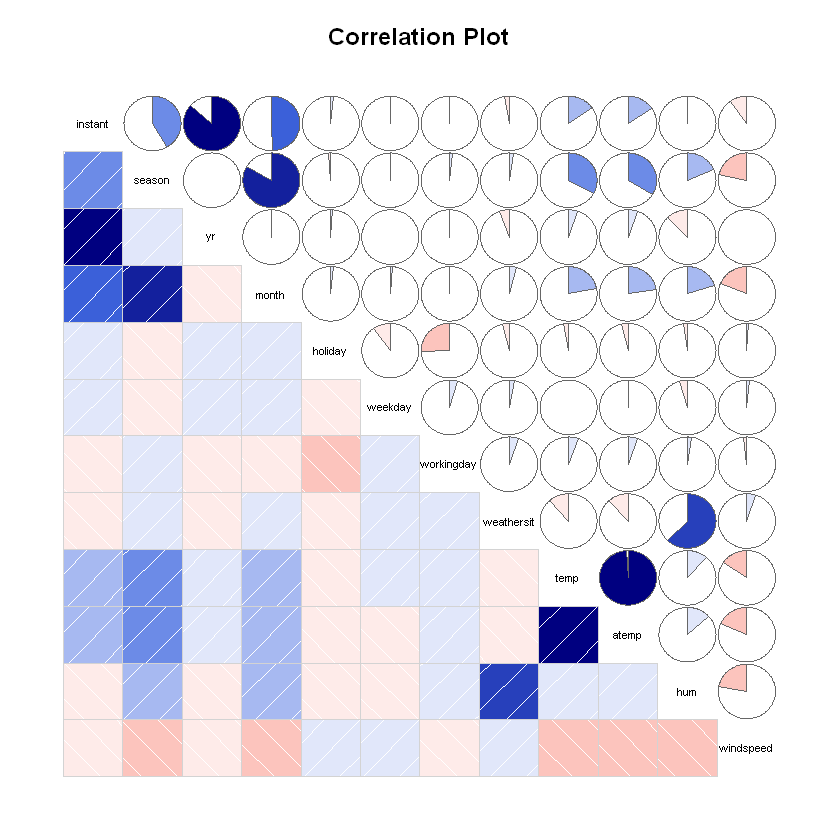

In [9]:
###Correlation plot
#Extreme Blue:highly positively correlated.
#Extreme Red :highly negatively correlated. 
# Check co-orelation between variables
temp_brp = subset(brp, select = -c(registered, casual, count))
numeric_index = sapply(temp_brp ,is.numeric)

numeric_data = temp_brp[,numeric_index]
cnames = colnames(numeric_data)


corrgram(temp_brp[,numeric_index],order = F,upper.panel=panel.pie,text.panel = panel.txt,
         main = "Correlation Plot")


In [10]:
instant=brp[nrow(brp),'instant'] + 1
input_index = as.integer(row.names(brp)[nrow(brp)])

de <- list(instant=instant ,season=season, yr=yr, month=mnth, holiday=holiday, weekday=weekday, workingday=workingday, weathersit=weathersit, 
           temp=temp, atemp=atemp, hum=hum, windspeed=windspeed, casual=as.integer(9), registered=as.integer(432), count=as.integer(441))
brp = rbind(brp,de, stringsAsFactors=FALSE)
str(brp)


brp = subset(brp, select = -c(instant, month, yr))
hola=brp



'data.frame':	716 obs. of  15 variables:
 $ instant   : num  1 2 3 4 5 6 7 8 9 10 ...
 $ season    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ yr        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ month     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ holiday   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ weekday   : int  6 0 1 2 3 4 5 6 0 1 ...
 $ workingday: int  0 0 1 1 1 1 1 0 0 1 ...
 $ weathersit: int  2 2 1 1 1 1 2 2 1 1 ...
 $ temp      : num  0.344 0.363 0.196 0.2 0.227 ...
 $ atemp     : num  0.364 0.354 0.189 0.212 0.229 ...
 $ hum       : num  0.806 0.696 0.437 0.59 0.437 ...
 $ windspeed : num  0.16 0.249 0.248 0.16 0.187 ...
 $ casual    : int  331 131 120 108 82 88 148 68 54 41 ...
 $ registered: int  654 670 1229 1454 1518 1518 1362 891 768 1280 ...
 $ count     : int  985 801 1349 1562 1600 1606 1510 959 822 1321 ...


## Feature Scaling

In [11]:

cols=c('instant','season','yr','month','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual',
       'registered','count')

# Saving the continuous variable names.
# Normalisation
# for(i in cols)
# {
#   print(i)
#   bld[,i] = (bld[,i] - min(bld[,i]))/
#                                 (max(bld[,i]) - min(bld[,i]))
# }
# Above- Converting of variables in normalized variables.

# Below-Standardisation(Apply it when, the data is following the normality pattern)
for(i in names(brp))
{
#   print(i)
  brp[,i] = (brp[,i] - mean(brp[,i]))/
                                sd(brp[,i])  
}
# brp[,'holiday'] = (brp[,'holiday'] - mean(brp[,'holiday'])) / sd(brp[,'holiday'])
str(brp)
# summary(brp)

'data.frame':	716 obs. of  12 variables:
 $ season    : num  -1.36 -1.36 -1.36 -1.36 -1.36 ...
 $ holiday   : num  -0.174 -0.174 -0.174 -0.174 -0.174 ...
 $ weekday   : num  1.49765 -1.49348 -0.99495 -0.49643 0.00209 ...
 $ workingday: num  -1.467 -1.467 0.681 0.681 0.681 ...
 $ weathersit: num  1.101 1.101 -0.728 -0.728 -0.728 ...
 $ temp      : num  -0.834 -0.729 -1.639 -1.619 -1.472 ...
 $ atemp     : num  -0.687 -0.747 -1.751 -1.612 -1.508 ...
 $ hum       : num  1.253 0.466 -1.39 -0.292 -1.392 ...
 $ windspeed : num  -0.3826 0.7684 0.7654 -0.3846 -0.0369 ...
 $ casual    : num  -0.758 -1.048 -1.064 -1.082 -1.119 ...
 $ registered: num  -1.94 -1.93 -1.57 -1.42 -1.38 ...
 $ count     : num  -1.83 -1.92 -1.64 -1.53 -1.51 ...


## Create data partition

In [12]:
# Dividing data into train and test using stratified sampling method.(Since, our target variable "default" is binary classification.(Yes or no)).

# library(DataCombine)

set.seed(1234)
train.index = createDataPartition(c(brp$count), p = .80, list = FALSE)
train.index = train.index[-nrow(train.index),]
# Above- list= false(we don't want repetitive observations in the training data,
# responded =0.80(80% of observations in marketing_train),the func createData... will return indexes of the observations)
train = brp[train.index,]
test = brp[-train.index,]


hola = hola[-train.index,]

# acv = actual_count_value
acv = as.data.frame(hola[,'count'], col.names = c('count'))
names(acv)[names(acv) == 'hola[, "count"]'] <- "count"
# A- Storing count variable original values and renaming its column name
tail(acv, 5)


,count
,<int>
137,4585
138,5557
139,4128
140,1796
141,441


# ML models
## 1.Multiple Linear regression

Mean Square Error = 0.58
Root mean square error = 0.70
R-Square value = 0.52

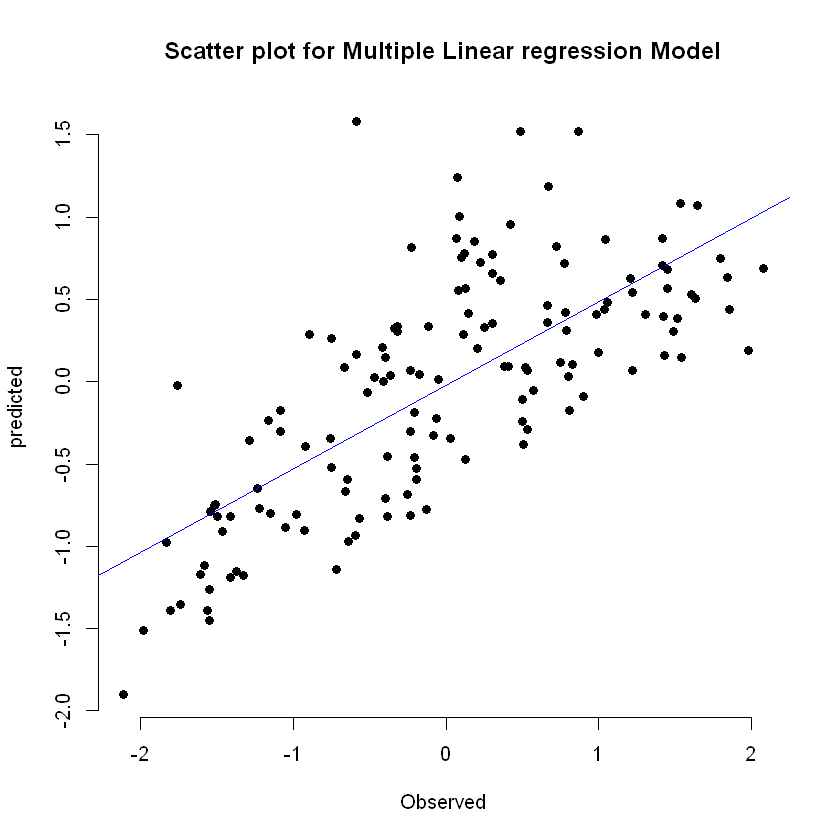

In [13]:
# temp_brp = subset(brp, select=-c(count))

LR_model <- lm(count ~ season + holiday + weekday + workingday + weathersit 
                   + temp + atemp + hum + windspeed, data=brp)  

# summary(LR_model)

pred <- predict(LR_model, newdata = test)

cat(sprintf ("Mean Square Error = %0.2f", MAE(pred, test$count)))
cat(sprintf ("\nRoot mean square error = %0.2f",RMSE(pred, test$count)))
cat(sprintf ("\nR-Square value = %0.2f",R2(pred, test$count)))


pred<- as.data.frame(pred)
names(pred)[names(pred) == "1"] <- "pred"
ole = data.frame(observed=test$count, predicted=pred$pred, stringsAsFactors = FALSE)

plot(ole$observed, ole$predicted,main = "Scatter plot for Multiple Linear regression Model",
     xlab = "Observed", ylab = "predicted",
     pch = 19, frame = FALSE)
abline(lm(predicted ~ observed, data=ole), col = "blue")


## For input data

In [14]:

dcv = pred$pred*(sd(acv$count)) + mean(acv$count) 

dcv = as.data.frame(dcv)


cat("\nActual count value\n", acv[nrow(acv),1])
cat("\nPredicted count value\n", as.integer(dcv[nrow(dcv),1]))



Actual count value
 441
Predicted count value
 747

## 2.Decision Tree Regression

Mean Square Error = 0.48
Root mean square error = 0.59
R-Square value = 0.67

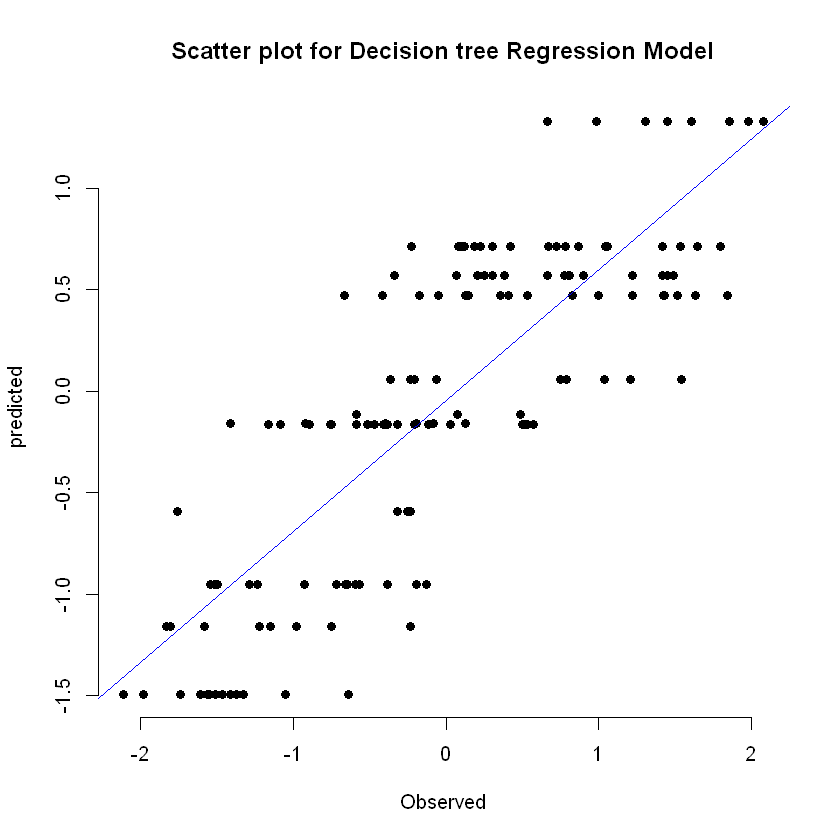

In [15]:
library(rpart)

DT_model <- rpart(count ~ season + holiday + weekday + workingday + weathersit 
                   + temp + atemp + hum + windspeed,  method="anova", data=brp )

pred <- predict(DT_model, newdata = test)

cat(sprintf ("Mean Square Error = %0.2f", MAE(pred, test$count)))
cat(sprintf ("\nRoot mean square error = %0.2f",RMSE(pred, test$count)))
cat(sprintf ("\nR-Square value = %0.2f",R2(pred, test$count)))

pred<- as.data.frame(pred)
names(pred)[names(pred) == "1"] <- "pred"
ole = data.frame(observed=test$count, predicted=pred$pred, stringsAsFactors = FALSE)

plot(ole$observed, ole$predicted,main = "Scatter plot for Decision tree Regression Model",
     xlab = "Observed", ylab = "predicted",
     pch = 19, frame = FALSE)
abline(lm(predicted ~ observed, data=ole), col = "blue")


## For input data

In [16]:

dcv = pred$pred*(sd(acv$count)) + mean(acv$count) 

dcv = as.data.frame(dcv)


cat("\nActual count value\n", acv[nrow(acv),1])
cat("\nPredicted count value\n", as.integer(dcv[nrow(dcv),1]))



Actual count value
 441
Predicted count value
 1545

## 3.Random Forest

Mean Square Error = 0.25
Root mean square error = 0.28
R-Square value = 0.94

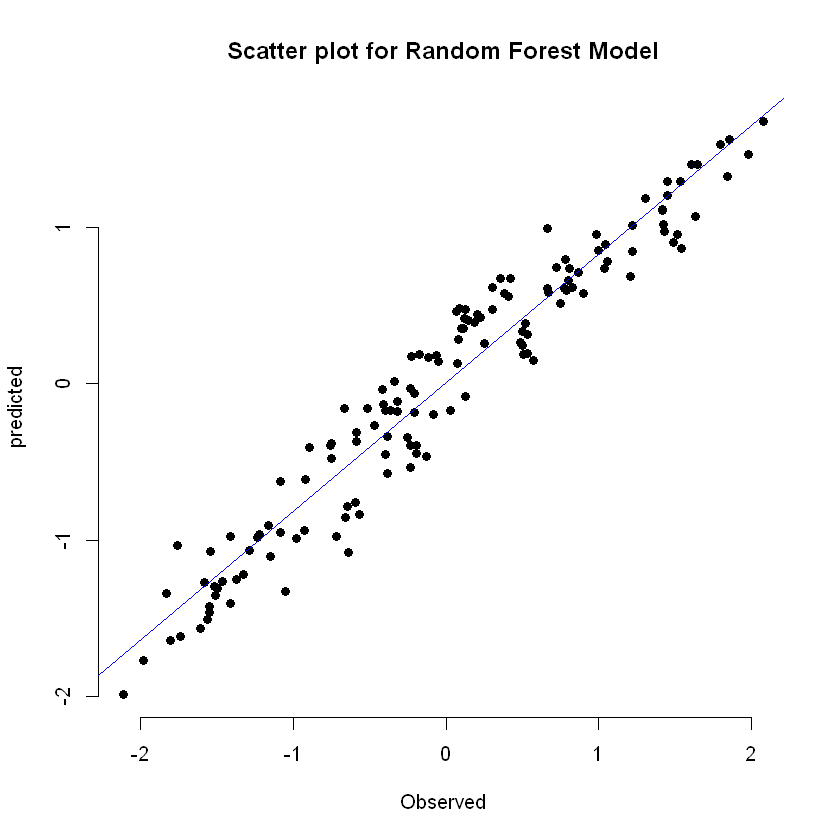

In [17]:
library(rpart)

RF_model <- randomForest(count ~ season + holiday + weekday + workingday + weathersit 
                   + temp + atemp + hum + windspeed, data=brp, prox=TRUE)


pred <- predict(RF_model, newdata = test)

cat(sprintf ("Mean Square Error = %0.2f", MAE(pred, test$count)))
cat(sprintf ("\nRoot mean square error = %0.2f",RMSE(pred, test$count)))
cat(sprintf ("\nR-Square value = %0.2f",R2(pred, test$count)))

pred<- as.data.frame(pred)
names(pred)[names(pred) == "1"] <- "pred"
ole = data.frame(observed=test$count, predicted=pred$pred, stringsAsFactors = FALSE)

plot(ole$observed, ole$predicted,main = "Scatter plot for Random Forest Model",
     xlab = "Observed", ylab = "predicted",
     pch = 19, frame = FALSE)
abline(lm(predicted ~ observed, data=ole), col = "blue")



## For input data

In [18]:
dcv = pred$pred*(sd(acv$count)) + mean(acv$count) 

dcv = as.data.frame(dcv)


cat("\nActual count value\n", acv[nrow(acv),1])
cat("\nPredicted count value\n", as.integer(dcv[nrow(dcv),1]))



Actual count value
 441
Predicted count value
 580

## 4.GBM Model

Mean Square Error = 0.21
Root mean square error = 0.25
R-Square value = 0.94

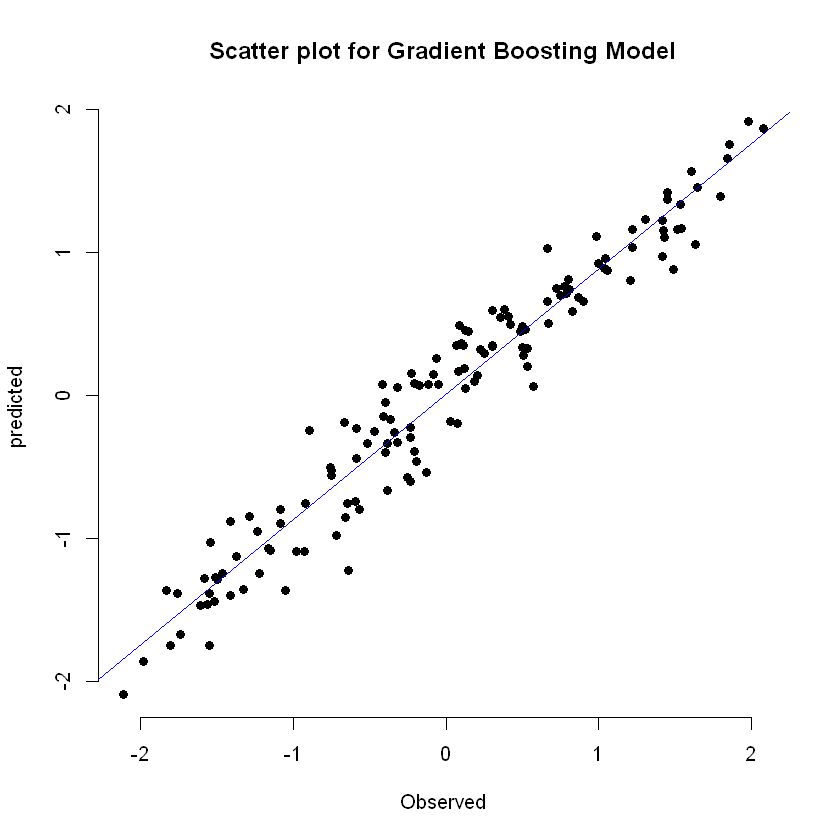

In [19]:
GB_model <- gbm(count ~ season + holiday + weekday + workingday + weathersit 
                   + temp + atemp + hum + windspeed, data=brp,distribution = "gaussian",n.trees = 10000,
                  shrinkage = 0.01, interaction.depth = 4)


pred <- predict(GB_model, newdata=test, n.trees=10000, type = "link", single.tree = FALSE)
cat(sprintf ("Mean Square Error = %0.2f", MAE(pred, test$count)))
cat(sprintf ("\nRoot mean square error = %0.2f",RMSE(pred, test$count)))
cat(sprintf ("\nR-Square value = %0.2f",R2(pred, test$count)))

pred<- as.data.frame(pred)
names(pred)[names(pred) == "1"] <- "pred"
ole = data.frame(observed=test$count, predicted=pred$pred, stringsAsFactors = FALSE)

plot(ole$observed, ole$predicted,main = "Scatter plot for Gradient Boosting Model",
     xlab = "Observed", ylab = "predicted",
     pch = 19, frame = FALSE)
abline(lm(predicted ~ observed, data=ole), col = "blue")


## For input data

In [20]:
dcv = pred$pred*(sd(acv$count)) + mean(acv$count) 

dcv = as.data.frame(dcv)


cat("\nActual count value\n", acv[nrow(acv),1])
cat("\nPredicted count value\n", as.integer(dcv[nrow(dcv),1]))



Actual count value
 441
Predicted count value
 364

## 5.Extreme Gradient Boosting Model 

Mean Square Error = 0.01
Root mean square error = 0.01
R-Square value = 1.00

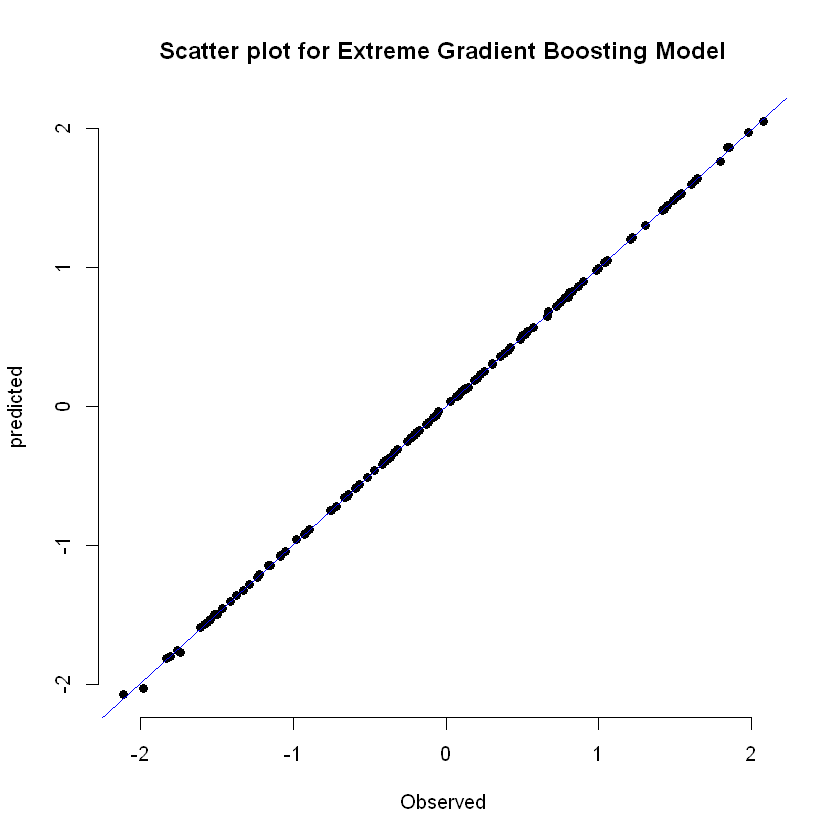

In [21]:
library(xgboost) 
XGB_model <- xgboost(data = as.matrix(train), # training data as matrix
                      label = train$count,  # column of outcomes
                      nrounds = 250,       # number of trees to build
                      objective = "reg:linear", # objective
                      eta = 0.02,
                      depth = 3,
                      verbose = 0  # silent
)

pred <- predict(XGB_model, newdata=as.matrix(test))

cat(sprintf ("Mean Square Error = %0.2f", MAE(pred, test$count)))
cat(sprintf ("\nRoot mean square error = %0.2f",RMSE(pred, test$count)))
cat(sprintf ("\nR-Square value = %0.2f",R2(pred, test$count)))

pred<- as.data.frame(pred)
names(pred)[names(pred) == "1"] <- "pred"
ole = data.frame(observed=test$count, predicted=pred$pred, stringsAsFactors = FALSE)

plot(ole$observed, ole$predicted,main = "Scatter plot for Extreme Gradient Boosting Model",
     xlab = "Observed", ylab = "predicted",
     pch = 19, frame = FALSE)
abline(lm(predicted ~ observed, data=ole), col = "blue")

## For input data

In [22]:
dcv = pred$pred*(sd(acv$count)) + mean(acv$count) 

dcv = as.data.frame(dcv)


cat("\nActual count value\n", acv[nrow(acv),1])
cat("\nPredicted count value\n", as.integer(dcv[nrow(dcv),1]))



Actual count value
 441
Predicted count value
 414

## 6.Ridge Regression

Mean Square Error = 0.48
Root mean square error = 0.69
R-Square value = -0.01

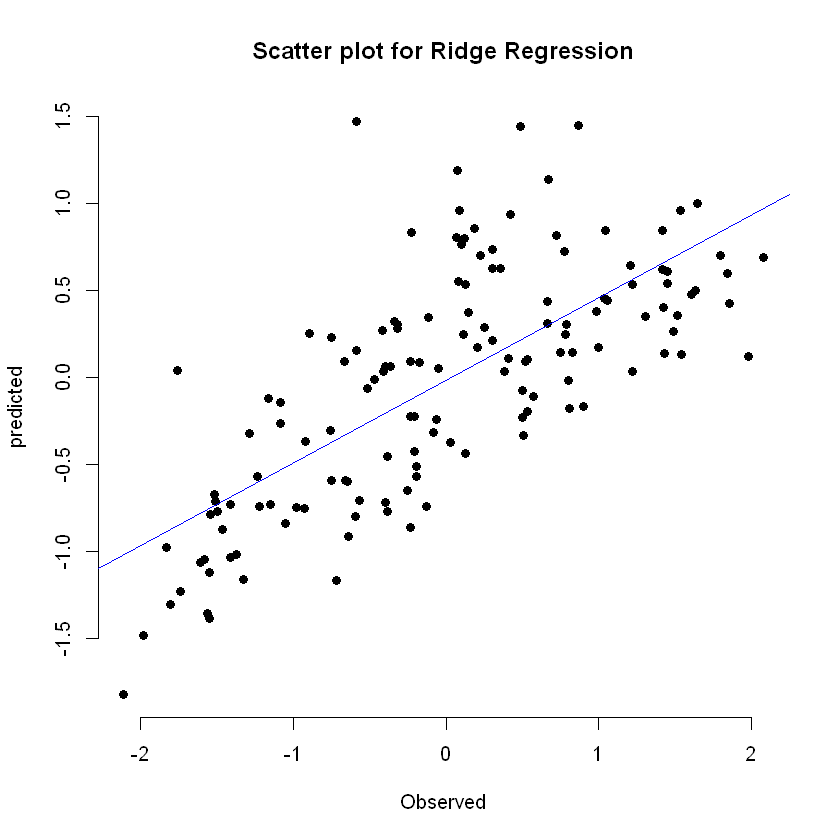

In [23]:
y <- train$count
x <- as.matrix(train[,1:9])
lambdas <- 10^seq(3, -2, by = -.1)

RR_model <- cv.glmnet(x, y, alpha = 0, lambda = lambdas)

opt_lambda <- RR_model$lambda.min
# opt_lambda

pred <- predict(RR_model, s = opt_lambda, newx = as.matrix(test[,1:9]))

sst <- sum(test$count - mean(test$count^2))
sse <- sum((pred -test$count^2))
MSE=min(RR_model$cvm)

cat(sprintf ("Mean Square Error = %0.2f", MSE))
cat(sprintf ("\nRoot mean square error = %0.2f", sqrt(MSE)))
cat(sprintf ("\nR-Square value = %0.2f",1 - sse / sst))




pred<- as.data.frame(pred)
names(pred)[names(pred) == "1"] <- "pred"
ole = data.frame(observed=test$count, predicted=pred$pred, stringsAsFactors = FALSE)

plot(ole$observed, ole$predicted,main = "Scatter plot for Ridge Regression",
     xlab = "Observed", ylab = "predicted",
     pch = 19, frame = FALSE)
abline(lm(predicted ~ observed, data=ole), col = "blue")



## For input data

In [24]:
dcv = pred$pred*(sd(acv$count)) + mean(acv$count) 

dcv = as.data.frame(dcv)


cat("\nActual count value\n", acv[nrow(acv),1])
cat("\nPredicted count value\n", as.integer(dcv[nrow(dcv),1]))



Actual count value
 441
Predicted count value
 897

## 7.SVR model

Warning message in pred - y:
"longer object length is not a multiple of shorter object length"


Mean Square Error = 0.45
Root mean square error = 0.56
R-Square value = 0.61

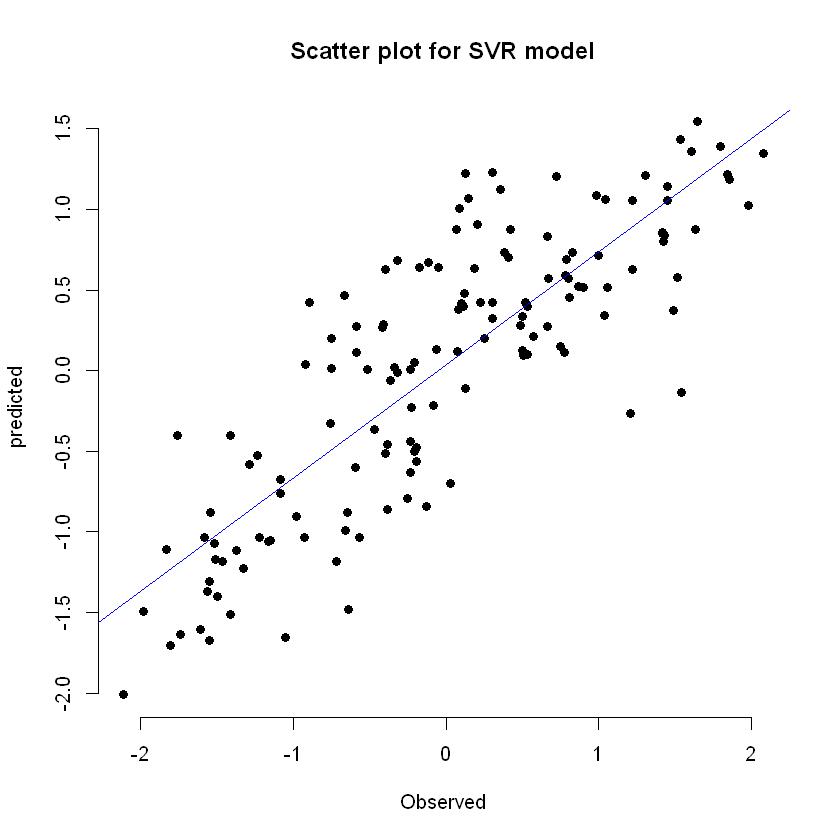

In [25]:
SVR_model = svm(count ~ season + holiday + weekday + workingday + weathersit 
                   + temp + atemp + hum + windspeed, data=brp, importance=TRUE)
pred = predict(SVR_model, test)


sst <- sum((y - mean(y))^2)
sse <- sum((pred - y)^2)


cat(sprintf ("Mean Square Error = %0.2f", MAE(pred, test$count)))
cat(sprintf ("\nRoot mean square error = %0.2f",RMSE(pred, test$count)))
cat(sprintf ("\nR-Square value = %0.2f", -(1 - sse / sst)))

pred <- as.data.frame(pred)

plot(test$count, pred$pred,main = "Scatter plot for SVR model",
     xlab = "Observed", ylab = "predicted",
     pch = 19, frame = FALSE)
abline(lm(pred$pred ~ test$count), col = "blue")


## For input data

In [26]:
dcv = pred$pred*(sd(acv$count)) + mean(acv$count) 

dcv = as.data.frame(dcv)


cat("\nActual count value\n", acv[nrow(acv),1])
cat("\nPredicted count value\n", as.integer(dcv[nrow(dcv),1]))



Actual count value
 441
Predicted count value
 533